#  Gitcoin FDD - Open Data Science Hackaton 

# What is this document
This notebook is part of exploration to find features/ methods that could indicate suspicious behavour that could integrate Gitcoin FDD ecosystem. 
As it is an exploration I an open to feedback and happy to contribute to further development. 

## Who I am 
Im a Brazilian, data analyst, postgraduate in data science that has ecommerce fraud detection experience. I am very keen of web3 and public goods ecosystems, and I want to make web3 a vehicle to decrease educational and financial gaps, not only, but focusing on latin america people.üôÇ 
discord/twitter : @stefi_says (#1654)

# Gitcoin hackaton explanation page : 



##  Slay Sybils, win prizes 
## Prize Bounty 
## Challenge Description 
 Thank you for your interest in helping to defend one person, one vote approaches to decision-making in this data science hackathon. In this challenge, you will access training data provided by Gitcoin and compete on the accuracy of your predictions **and** the value of the datasets you share - i.e. the transformations on the on-chain data you have prepared and used in your data science. 
## Judging Criteria 
You can compete using the data sets that are provided to you as well as other on-chain data that you may identify. We are interested as well in other sources of data that you may select and prepare as well. Those entries that do a good job categorizing potential Sybils and explaining their approach, the data they use, and their findings will be preferred. We are looking for solutions that show an appreciation of the complexity of the behavior of Sybils and that are well explained. Remember our judges and others are available to provide feedback as well in open forums such as the FDD-hackathon Discord channel.
## Winner Announcement Date 
#### Winners will be announced on Halloween - October 31, 2022. 
## Resources
We want this hackathon to help spark a broader open data science community. And remember communities are just humans collaborating to solve problems and have fun - so please get in touch and discuss your thoughts and approaches and questions with the judges. There is a hackathon channel in the Gitcoin discord called 
#FDD-hackathon
Join the Gitcoin discord and click on the lightbulb emoji to get a role that enables you to see the channel. You can join the Gitcoin discord here: [https://discord.gg/gitcoin](https://discord.gg/gitcoin) You can also read about existing Gitcoin efforts to slay Sybils on the Gitcoin forums, including: - [https://gov.gitcoin.co/t/closing-the-gap-between-fdd-and-gitcoin-passport-sybil-defenses/11218](https://gov.gitcoin.co/t/closing-the-gap-between-fdd-and-gitcoin-passport-sybil-defenses/11218) - [https://gov.gitcoin.co/t/the-limits-of-sybil-defense-and-how-composability-might-help/11524](https://gov.gitcoin.co/t/the-limits-of-sybil-defense-and-how-composability-might-help/11524) Here are some interesting data sources that our team put together to get you started: [GR_15_DATA](https://drive.google.com/drive/folders/17OdrV7SA0I56aDMwqxB6jMwoY3tjSf5w?usp=sharing)

# key concepts to understand the challenge and assumptions
- gitcoin functionalities
- quadratic funding 
- how wallets are created transaction on blockchain and fees
- what is sybil attacks 

# Hackaton Conclusion and proposal
### Main assumption:
fraudsters are distributing donations to a big number of grants, aiming to split the ROI between them so they grants are less suspicious.
### How to detect: 
finding wallets connections 
### How to conceptually avoid it: 
Force the fraudster to split the money between their accounts in an attempt to hide the connections so much that their ROI will be lost in gas fees.
## How to probably implement it
integrating a metric ( flag or score) that indicates correlation with other gr contributor wallets, previous grants contributors wallets and already detected fraudster wallets.  Compounding this metric the behaviour indicators distribution for each grant could be a part of this score (as done in the end of this analyses) 


## How I get to the main assumption:
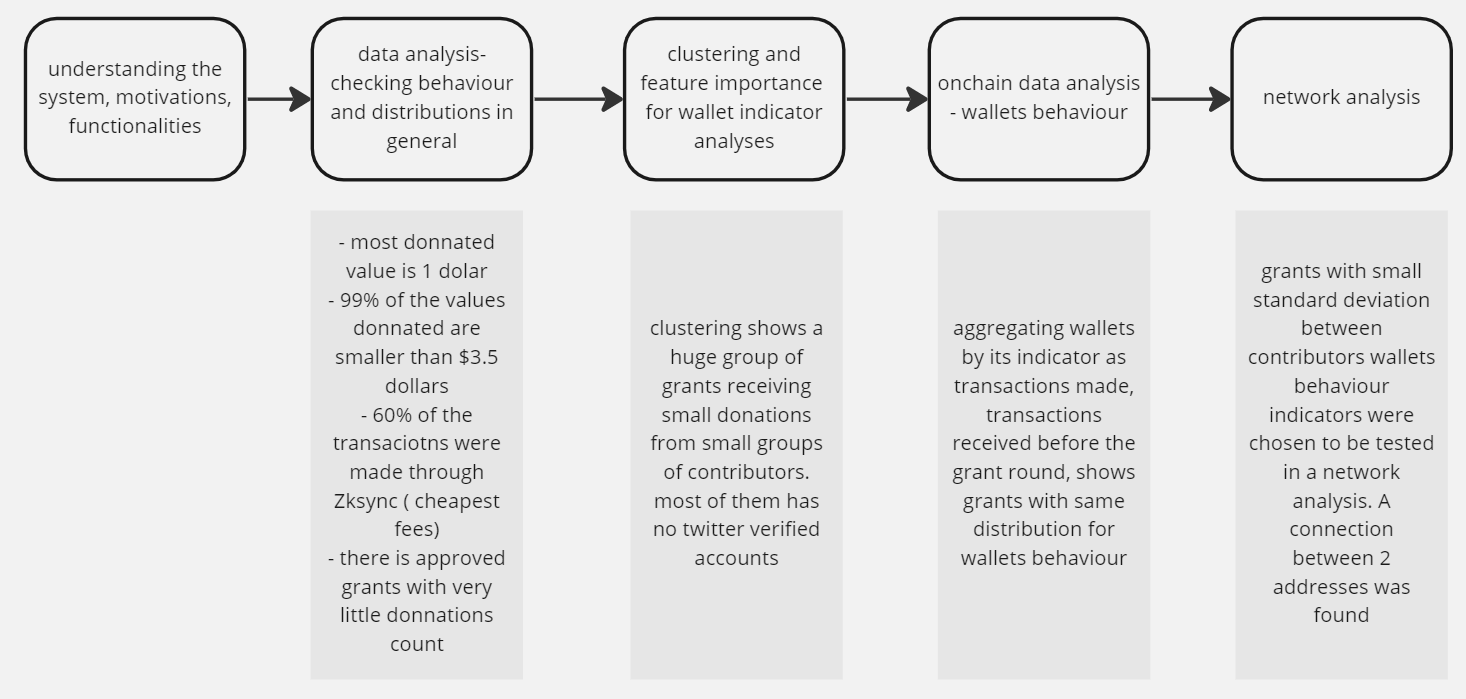




---


# Develpment

# Data

## Datasets
- hackaton datasets :[Hackaton google drive](https://drive.google.com/drive/folders/17OdrV7SA0I56aDMwqxB6jMwoY3tjSf5w)
   - gr15_grants
   - gr15_aplications
   - hackaton_contributions_dataset
- eth and polygon on chain data of wallets that made donnations to grant at GR15 round: 
[wallets transactions](https://huggingface.co/datasets/Poupou/Gitcoin-ODS-Hackhaton-GR15)
Provided by - [@poupou-web3](https://github.com/poupou-web3)

## datasets schema provided by the gitcoin team: 

### Hackathon-contributions-dataset*



* txn_id* - an internal ID for a contribution (off-chain)
* user_id*  - an internal ID for a contributor
* address* - the wallet address used to contribute
* grant_id* - the ID of a grant on gitcoin
* chain* - the chain used for the contribution (eth, zksync, polygon...)
* txn_hash* - the hash of the transaction (on-chain)
* network* - mainnet or testnet
* token* - the token contributed
* amount_in_usdt* - the equivalent amount contributed in usdt
* timestamp* - the time of the contribution






### grants_applications_gr15*

* grant_id* - the ID of a grant on gitcoin
* active* - is it active at the moment of export (end of round) will it receive its matching or not
* approved* - was approved (illegible for matching)
* address* - the wallet address to receive the contributions
* title* - the title of the grant (name)
* url* - the url of the grant on Gitcoin website
* description* - the description of the grant
* created_on* - the time of creation


### gr15_grants*

* grant_id* - the ID of a grant on gitcoin
* active* - is it active at the moment of export (end of round) will it receive its matching or not
* title* - the title of the grant (name)
* address* - the wallet address to receive the contributions
* amout_received* - The total amount received all-time (usdt)
* amount_received_in_round* - the amount recieved this round (usdt)
* contribution_count* - the number of contributions
* contributor_count* - the number of contributors
* description* - the description of the grant
* website* - the website of the grant (not gitcoin page)
* github_project_url* - the github of the grant
* twitter_handle_1* - the twitter handle of grant
* twitter_handle_2* - the twitter handle of grant
* twitter_verified* - whether the twitter account was verified
* created_on* - the time of creation
* last_update* - the time of latest update by the grantee

# Libraries

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from requests import get
from matplotlib import pyplot as plt
from datetime import datetime
import time

In [2]:
!pip install networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading and cleanning

### grants dataset

In [4]:
## GR15 Grants 
gr = pd.read_json('/content/drive/MyDrive/Colab Notebooks/hackathon - gitcoin/gr15_grants.json')


In [5]:
gr = gr.transpose()
gr.head(5)

grant_id active                                              title  \
0     8017   True  Alphabetting, the first hedge fund based on fa...   
1     7979   True  Ikhala Impact - a one stop data shop for small...   
2     7977   True                             DOM ‚Äì unstoppable bank   
3     7976   True  Aquarian Creative: Artist-In-Residence, Schola...   
4     7974   True                SolDAO ‚Äî Building Solidity as a DAO   

                                      address amount_received  \
0  0xE7048aB8dFA7F7a80d79fD6c5AcF8B0C1d174fdF         15.2506   
1  0xcC17a95B3f5861BC2cfD28ca81d611077ef36ED1         13.2079   
2  0x715465a41a34Fb1Af53328708171c0FBf2B88825         31.1689   
3  0x7ABDd18D37571e1BA884A8fA9E07a3612b584661          6.5128   
4  0xF77494B20F2DF03a7663465a001486F834739A78        237.7176   

  amount_received_in_round contribution_count contributor_count  \
0                  15.2506                 13                13   
1                  13.2079                  7                 7   
2                  31.1689                  7                 7   
3                   6.5128                  5                 5   
4                 237.7176                167               148   

                                         description  \
0  Alpha Fund returns are not correlated to the p...   
1  üëãAbout ADTechüëãüèæ\r\n\r\nAfrican Data Technologi...   
2  DOM ‚Äì unstoppable bank\r\nturn on, tune in, dr...   
3  The Aquarian Creative mission promotes the edu...   
4  Solidity smart contracts are more secure and e...   

                                         website  \
0                https://www.alphabetting.com.br   
1                  https://www.africandata.tech/   
2                             https://dom.money/   
3  http://m0niquesullivan.com/aquarian-creative/   
4                       https://solgov.eth.limo/   

                           github_project_url twitter_handle_2  \
0                                        None     leanderdulac   
1  https://github.com/SambaGod/IkhalaPlatform     bekker_wihan   
2                                        None       GringamorH   
3                                        None  M0niquesullivan   
4                  https://github.com/Sol-DAO          _SolDAO   

  twitter_handle_1 twitter_verified                 created_on  \
0     leanderdulac             True  2022-09-16 00:08:35+00:00   
1     IkhalaImpact             True  2022-09-15 14:39:42+00:00   
2   DOMUNSTOPPABLE             True  2022-09-15 12:57:56+00:00   
3  M0niquesullivan             True  2022-09-15 12:03:10+00:00   
4          _SolDAO            False  2022-09-15 09:33:47+00:00   

                        last_update  
0  2022-09-28 19:53:25.215202+00:00  
1  2022-09-22 15:23:39.957873+00:00  
2         2022-09-15 12:57:56+00:00  
3         2022-09-15 12:03:10+00:00  
4         2022-09-15 09:33:47+00:00

In [6]:
gr.isnull().sum() # the data that has nulls where not used in the analyses 

grant_id                      0
active                        0
title                         0
address                       0
amount_received               0
amount_received_in_round      0
contribution_count            0
contributor_count             0
description                   3
website                       0
github_project_url          566
twitter_handle_2            197
twitter_handle_1             27
twitter_verified              0
created_on                    0
last_update                  77
dtype: int64

In [7]:
gr.duplicated().sum()

0

In [8]:
gr.drop(gr[gr['grant_id'] == 12].index, inplace = True)  # gitcoin grant submission

## aplications dataset 

In [9]:
aplic = pd.read_json('/content/drive/MyDrive/Colab Notebooks/hackathon - gitcoin/grants_applications_gr15.json')
aplic = aplic.transpose()
aplic.isnull().sum()

grant_id       0
active         0
approved       0
address        0
title          0
url            0
description    2
created_on     0
dtype: int64

In [10]:
aplic  = aplic.drop_duplicates()
aplic.head(5)

grant_id active approved                                     address  \
0     6841  False    False  0xDc4C1D5D42f829dfd4b772d3a678CfB178ee6476   
1     6842   True     True  0xCE41b49d28800De3Ba9925f68D82129dFc4b870B   
2     6843  False    False  0x8871b4405018e75f08a0bbc9f1fb0241f8b188ae   
3     6844  False    False  0x4C3477e9756610fcB7Dac007C03aE0D666fFc54E   
4     6845  False    False  0x9486C5CFE392763A25dC30C9F62f6D21f73d220f   

                                               title  \
0                                            4C Labs   
1    C# library for accessing NFTs on mobile devices   
2                                VDAO - First VC DAO   
3  Unisound: Web3.0 sample pack marketplace for m...   
4    Univerz.io decentralized - marketplace platform   

                                                 url  \
0             https://gitcoin.co/grants/6841/4c-labs   
1  https://gitcoin.co/grants/6842/c-library-for-a...   
2   https://gitcoin.co/grants/6843/vdao-first-vc-dao   
3  https://gitcoin.co/grants/6844/unisound-web30-...   
4  https://gitcoin.co/grants/6845/univerzio-decen...   

                                         description  \
0  Project Core:\r\n\t4C hopes to become the Brid...   
1  This is a lightweight open source C# library t...   
2  The project is a fund investing (early stage i...   
3  Unisound enables professional, yet undiscovere...   
4  Hello Fam we are looking to raise little funds...   

                      created_on  
0  2022-06-24T03:39:54.292-06:00  
1  2022-06-24T07:41:41.000-06:00  
2  2022-06-24T09:37:40.087-06:00  
3  2022-06-24T11:00:32.560-06:00  
4  2022-06-24T12:33:04.737-06:00

In [11]:
aplic.isnull().sum() # the data that has nulls where not used in the analyses 

grant_id       0
active         0
approved       0
address        0
title          0
url            0
description    2
created_on     0
dtype: int64

## transactions dataset

In [12]:
trx = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hackathon - gitcoin/hackathon-contributions-dataset_v2.csv')
trx =trx.drop_duplicates()

In [13]:
trx.grant_id.value_counts() # 1501 grants receved donnations

5719    32461
5288    16619
5007    16382
6667    16185
7213    15809
        ...  
5079        1
4981        1
4503        1
4170        1
7521        1
Name: grant_id, Length: 1501, dtype: int64

In [14]:
trx.isnull().sum()

txn_id            0
user_id           0
address           6
grant_id          0
chain             7
txn_hash          9
network           0
token             0
amount_in_usdt    0
timestamp         0
dtype: int64

In [15]:
trx.amount_in_usdt.mode() # most donated value is 1 dolar


0    1.0
dtype: float64

In [16]:
trx.chain.value_counts(normalize = True)

eth_zksync     0.601251
eth_std        0.273352
eth_polygon    0.125392
celo_std       0.000005
Name: chain, dtype: float64

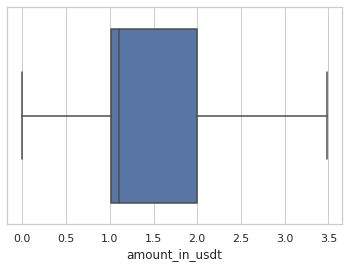

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot( data = trx, x = 'amount_in_usdt', showfliers = False)  # not showing outliersb

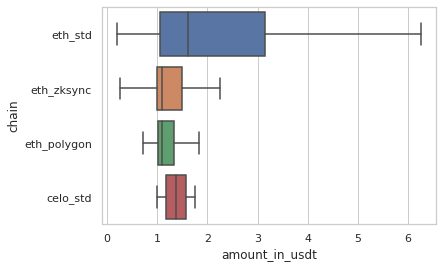

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot( data = trx, x = 'amount_in_usdt', y = 'chain', showfliers = False)

In [19]:
agg_trx = pd.DataFrame(trx.groupby(['address', 'grant_id']).agg( {'user_id' : 'nunique'}).sort_values(by ='user_id', ascending = False))
agg_trx =agg_trx.reset_index()
agg_trx[agg_trx['user_id'] >2]['grant_id'].value_counts().shape

(49,)

#grants analysis 

In [20]:
gr_agg = trx.groupby('grant_id').agg({'amount_in_usdt':['count','nunique','sum','median','std']})
gr_agg = gr_agg.droplevel(0, axis = 1)

In [21]:
gr_agg

count  nunique           sum     median        std
grant_id                                                    
13         1428      450  11056.974169   1.250000  28.601935
15            1        1      1.012240   1.012240        NaN
17            1        1      1.012240   1.012240        NaN
20            4        4    106.456088  11.000000  38.887419
22            1        1      1.012147   1.012147        NaN
...         ...      ...           ...        ...        ...
7974        158       60    222.587161   1.178397   0.453151
7976          3        3      4.512568   1.012240   0.862418
7977          2        2      2.012568   1.006284   0.008423
7979          4        4      9.928948   1.765464   2.073420
8017          8        8     10.084148   1.329418   0.220901

[1501 rows x 5 columns]

In [22]:
gr_chain_agg = trx.groupby(['grant_id', 'chain']).agg({'amount_in_usdt':['count','sum','median','std']}).unstack()
gr_chain_agg = gr_chain_agg.droplevel(0, axis= 1)

In [23]:
gr_chain_agg

count                                     sum              \
chain    celo_std eth_polygon eth_std eth_zksync celo_std eth_polygon   
grant_id                                                                
13            NaN        43.0   601.0      784.0      NaN  182.003915   
15            NaN         NaN     NaN        1.0      NaN         NaN   
17            NaN         NaN     NaN        1.0      NaN         NaN   
20            NaN         NaN     2.0        2.0      NaN         NaN   
22            NaN         NaN     1.0        NaN      NaN         NaN   
...           ...         ...     ...        ...      ...         ...   
7974          NaN         NaN    81.0       77.0      NaN         NaN   
7976          NaN         NaN     2.0        1.0      NaN         NaN   
7977          NaN         NaN     2.0        NaN      NaN         NaN   
7979          NaN         NaN     3.0        1.0      NaN         NaN   
8017          NaN         NaN     6.0        2.0      NaN         NaN   

                                     median                                    \
chain         eth_std   eth_zksync celo_std eth_polygon    eth_std eth_zksync   
grant_id                                                                        
13        8957.372499  1917.597755      NaN         1.1   2.860030   1.031003   
15                NaN     1.012240      NaN         NaN        NaN   1.012240   
17                NaN     1.012240      NaN         NaN        NaN   1.012240   
20         103.456088     3.000000      NaN         NaN  51.728044   1.500000   
22           1.012147          NaN      NaN         NaN   1.012147        NaN   
...               ...          ...      ...         ...        ...        ...   
7974       124.856350    97.730811      NaN         NaN   1.319935   1.100000   
7976         2.012568     2.500000      NaN         NaN   1.006284   2.500000   
7977         2.012568          NaN      NaN         NaN   1.006284        NaN   
7979         7.398348     2.530600      NaN         NaN   1.000328   2.530600   
8017         7.584148     2.500000      NaN         NaN   1.329418   1.250000   

              std                                    
chain    celo_std eth_polygon    eth_std eth_zksync  
grant_id                                             
13            NaN    11.04807  42.672128   4.571780  
15            NaN         NaN        NaN        NaN  
17            NaN         NaN        NaN        NaN  
20            NaN         NaN  44.870230   0.707107  
22            NaN         NaN        NaN        NaN  
...           ...         ...        ...        ...  
7974          NaN         NaN   0.477693   0.381463  
7976          NaN         NaN   0.008423        NaN  
7977          NaN         NaN   0.008423        NaN  
7979          NaN         NaN   2.539103        NaN  
8017          NaN         NaN   0.207984   0.353553  

[1498 rows x 16 columns]

In [24]:
gr_agg.rename(columns = {'count' : 'count_trx','nunique':'nunique_trx_value', 'sum':'sum_amount_trx','median':'median_trx','std' :'std_trx'}, inplace = True)

In [25]:
gr = pd.merge(gr,gr_agg, how = 'left', on = 'grant_id')

gr = pd.merge(gr,gr_chain_agg, how = 'left', on = 'grant_id')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
gr = gr.fillna(0)

In [27]:
filter_trx  = gr['count_trx']> 1

In [28]:
gr[filter_trx][['grant_id', 'std_trx','count_trx','sum_amount_trx']].sort_values(by ='std_trx' )

grant_id      std_trx  count_trx  sum_amount_trx
1342       852     0.000000        2.0        2.649105
1235      1863     0.000000        2.0        2.000000
1364       679     0.000000        2.0        2.649105
142       7613     0.000000        2.0       17.216700
16        7925     0.000000        2.0        2.000000
...        ...          ...        ...             ...
336       7316   496.276511        6.0     1971.230850
1121      3368   550.101627        3.0     1094.536950
1114      3414   793.615429      159.0    10863.875121
1260      1668  1762.442061     1169.0    76463.538258
1028      4118  2120.840977       89.0    22202.670092

[1215 rows x 4 columns]

## section  takeaways

- 1501 grants receiving donnations 
- most donnated value is 1 dolar
- 99% of the values donnated are smaller than $3.5 dollars
- the distribution of values varies a lot between chains but eth_std has the biggest variance 
- 60% of the transaciotns were made through Zksync, followed by eth_std (27%) then polygon (12%)
- some address made more than one donnations to the grant considering the fees and the fraud ROI, this would not make sense, then this could be a indicator of good address
- there is approved grants with very little donnations count



# Clustering
The idea here is try to aggregate grants that are alike together hopping one of the groups could show some suspicious behaviour

In [84]:
gr.columns

Index([                'grant_id',                   'active',
                          'title',                  'address',
                'amount_received', 'amount_received_in_round',
             'contribution_count',        'contributor_count',
                    'description',                  'website',
             'github_project_url',         'twitter_handle_2',
               'twitter_handle_1',         'twitter_verified',
                     'created_on',              'last_update',
                      'count_trx',        'nunique_trx_value',
                 'sum_amount_trx',               'median_trx',
                        'std_trx',      ('count', 'celo_std'),
         ('count', 'eth_polygon'),       ('count', 'eth_std'),
          ('count', 'eth_zksync'),        ('sum', 'celo_std'),
           ('sum', 'eth_polygon'),         ('sum', 'eth_std'),
            ('sum', 'eth_zksync'),     ('median', 'celo_std'),
        ('median', 'eth_polygon'),      ('median', 'eth

In [85]:
gr_clus = gr[[('count', 'celo_std'),
         ('count', 'eth_polygon'),       ('count', 'eth_std'),
          ('count', 'eth_zksync'),        ('sum', 'celo_std'),
           ('sum', 'eth_polygon'),         ('sum', 'eth_std'),
            ('sum', 'eth_zksync'),     ('median', 'celo_std'),
        ('median', 'eth_polygon'),      ('median', 'eth_std'),
         ('median', 'eth_zksync'),        ('std', 'celo_std'),
           ('std', 'eth_polygon'),         ('std', 'eth_std'),
            ('std', 'eth_zksync'), 'twitter_verified','contributor_count', 'amount_received']]

/usr/local/lib/python3.7/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [86]:
gr_clus.fillna(0, inplace = True)
gr_clus.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


(count, celo_std)        0
(count, eth_polygon)     0
(count, eth_std)         0
(count, eth_zksync)      0
(sum, celo_std)          0
(sum, eth_polygon)       0
(sum, eth_std)           0
(sum, eth_zksync)        0
(median, celo_std)       0
(median, eth_polygon)    0
(median, eth_std)        0
(median, eth_zksync)     0
(std, celo_std)          0
(std, eth_polygon)       0
(std, eth_std)           0
(std, eth_zksync)        0
twitter_verified         0
contributor_count        0
amount_received          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packag

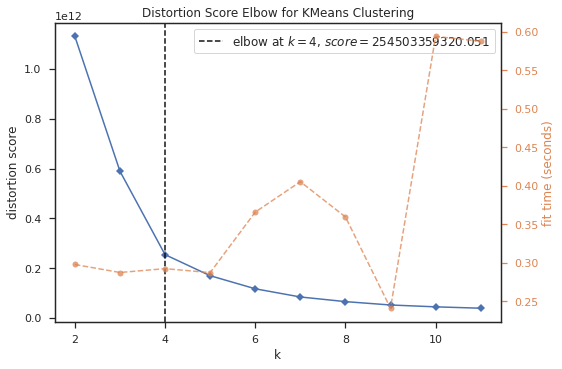

In [87]:
from yellowbrick.cluster import KElbowVisualizer  # ideal number of clusters analyses 
from sklearn.cluster import KMeans
model = KMeans(random_state = 15)
viz = KElbowVisualizer(model, k= (2,12))
viz.fit(gr_clus);
viz.show();

In [88]:
kmeans = KMeans(n_clusters= 4, random_state=15)
kmeans.fit(gr_clus)
gr_clus['cluster_cat'] = kmeans.labels_


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [89]:
gr['cluster_cat'] = gr_clus['cluster_cat'].copy()
gr.fillna(0, inplace = True)

In [90]:
gr.groupby(by = 'cluster_cat').agg({'grant_id' :['nunique'] ,'contributor_count' : ['median'],'amount_received_in_round': ['median'], 'sum_amount_trx' :['median'],  'std_trx' : ['median']})

grant_id contributor_count amount_received_in_round  \
             nunique            median                   median   
cluster_cat                                                       
0               1412              59.0                 37.88845   
1                 18           16745.0               3301.60495   
2                  1            9423.0              74864.18650   
3                 71            7115.0                449.09090   

            sum_amount_trx      std_trx  
                    median       median  
cluster_cat                              
0                36.963240     4.372636  
1              3947.787627    18.393656  
2             76463.538258  1762.442061  
3               668.400774     9.720885

In [91]:
dt_train = gr[['amount_received_in_round', 'contribution_count', 'contributor_count',
       'twitter_verified',('count', 'celo_std'),
         ('count', 'eth_polygon'),       ('count', 'eth_std'),
          ('count', 'eth_zksync'),        ('sum', 'celo_std'),
           ('sum', 'eth_polygon'),         ('sum', 'eth_std'),
            ('sum', 'eth_zksync'),     ('median', 'celo_std'),
        ('median', 'eth_polygon'),      ('median', 'eth_std'),
         ('median', 'eth_zksync'),        ('std', 'celo_std'),
           ('std', 'eth_polygon'),         ('std', 'eth_std'),
            ('std', 'eth_zksync') ]].copy()
dt_train = dt_train.fillna(0)
dt_train = dt_train.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [92]:
from sklearn.tree import DecisionTreeClassifier  # featuere importance was done to get features to compare correlation at the sccaterplot analyses 

dt = DecisionTreeClassifier()
dt.fit(dt_train,gr['cluster_cat'] )
feature_importance = pd.Series(dt.feature_importances_ , index = dt_train.columns)
feature_importance = feature_importance.sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


In [93]:
feature_importance.index

Index([      'contribution_count',      ('std', 'eth_zksync'),
          ('count', 'eth_zksync'),        'contributor_count',
            ('median', 'eth_std'),         ('sum', 'eth_std'),
            ('sum', 'eth_zksync'),       ('count', 'eth_std'),
       'amount_received_in_round',         ('std', 'eth_std'),
        ('median', 'eth_polygon'),   ('median', 'eth_zksync'),
           ('sum', 'eth_polygon'),   ('count', 'eth_polygon'),
              ('sum', 'celo_std'),      ('count', 'celo_std'),
           ('median', 'celo_std'),         'twitter_verified',
              ('std', 'celo_std'),     ('std', 'eth_polygon')],
      dtype='object')

In [94]:
dt_train['cluster_cat'] = gr['cluster_cat']

/usr/local/lib/python3.7/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/pandas/core/common.py:241: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If

<Figure size 1728x1728 with 0 Axes>

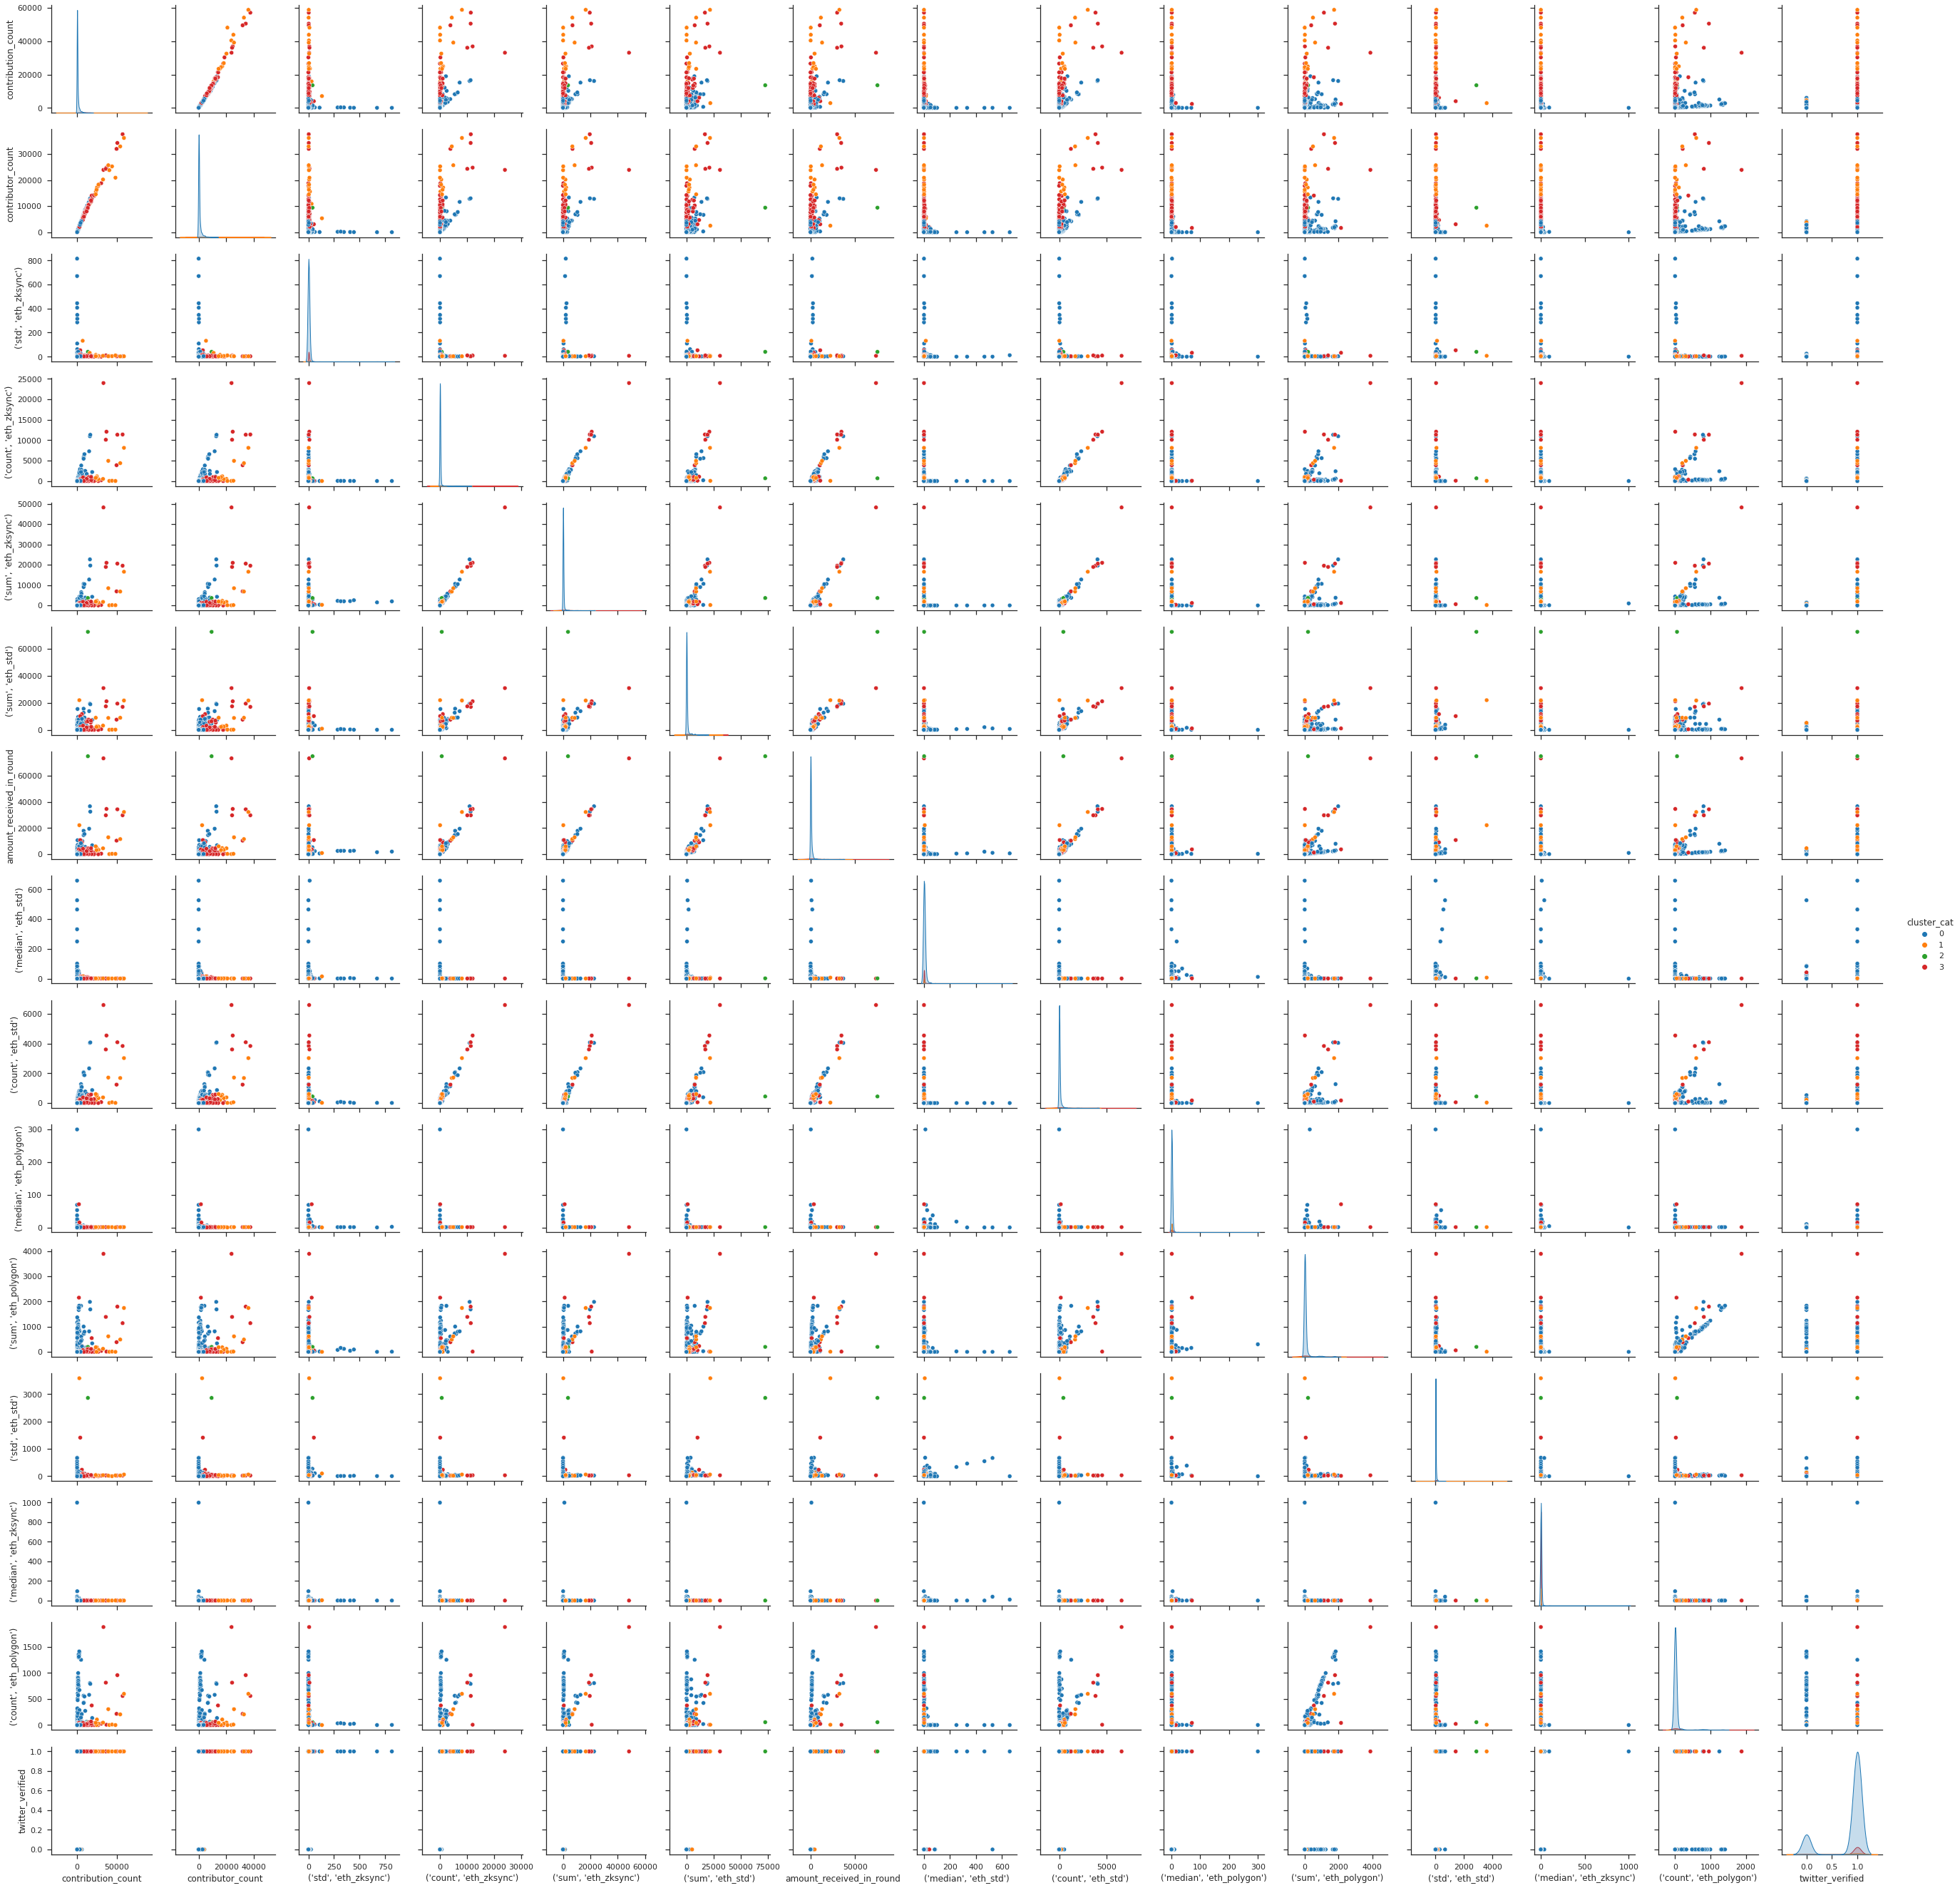

In [95]:
plt.figure(figsize=(24, 24))  # works best exporting the image so you can analyse it better zooming around
sns.set_theme(style="ticks")
sns.pairplot(dt_train[['contribution_count',        'contributor_count',
            ('std', 'eth_zksync'),    ('count', 'eth_zksync'),
            ('sum', 'eth_zksync'),         ('sum', 'eth_std'),
       'amount_received_in_round',      ('median', 'eth_std'),
             ('count', 'eth_std'),  ('median', 'eth_polygon'),
           ('sum', 'eth_polygon'),         ('std', 'eth_std'),
         ('median', 'eth_zksync'),   ('count', 'eth_polygon'),
'twitter_verified', 'cluster_cat']], hue = "cluster_cat", palette = 'tab10')

## Section takeways 

- group 0 show a huge number of grants receiving small sums in donations, with small number of contributors. This could be alarming in a sense that this small grants could be a tool to distribute the fraud revenue. 
- by the pairplot its possible to see that group 0 has most of the accounts not verifyed by twitter

# On chain data 

analysing wallets behaviour before grant round 


In [41]:
dt_poly = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hackathon - gitcoin/onchain data /datasets transactions/eth_polygon_transactions.csv')

In [42]:
dt_eth = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hackathon - gitcoin/onchain data /datasets transactions/eth_std_transactions.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
dt_poly.shape

(1277377, 21)

In [44]:
dt_poly.isna().sum() , dt_eth.isna().sum()

(blockNumber                0
 timeStamp                  0
 hash                       0
 nonce                      0
 blockHash                  0
 transactionIndex           0
 from                       0
 to                      1075
 value                      0
 gas                        0
 gasPrice                   0
 isError                    0
 txreceipt_status           0
 input                      0
 contractAddress      1276302
 cumulativeGasUsed          0
 gasUsed                    0
 confirmations              0
 methodId                   0
 functionName          113645
 address                    0
 dtype: int64, blockNumber                0
 timeStamp                  0
 hash                       0
 nonce                      0
 blockHash                  0
 transactionIndex           0
 from                       0
 to                      1534
 value                      0
 gas                        0
 gasPrice                   0
 isError                  

In [45]:
dt_eth.shape

(2960529, 21)

In [46]:
dt_poly.address.nunique()  #polygon unique addresses dataset

8227

In [47]:
dt_eth.address.nunique() #polygon unique addresses dataset 


19027

In [48]:
trx.groupby(['chain']).agg({'address' : 'nunique'})  # hackaton contributors dataset unique addresses 

address
chain               
celo_std           0
eth_polygon     8246
eth_std        19377
eth_zksync     36664

In [49]:
dt_poly['timeStamp'] = pd.to_datetime(dt_poly['timeStamp'],unit = 's')

dt_eth['timeStamp'] = pd.to_datetime(dt_eth['timeStamp'],unit = 's')

In [50]:
dpb = dt_poly[dt_poly['timeStamp'] <= '2022-09-22']  #limiting to transaction made before the grant closes 
dtb = dt_eth[dt_eth['timeStamp'] <= '2022-09-22']

In [51]:
dpb.shape , dtb.shape

((1080269, 21), (2782999, 21))

In [52]:
dpb.value = dpb.value.astype('float')
dtb.value = dtb.value.astype('float')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
ETHER_VALUE = 10 ** 18  # guei to ether
dpb.value = dpb.value/ ETHER_VALUE
dtb.value = dtb.value/ ETHER_VALUE


In [54]:
# aggregating  wallets information
agg_dpb = dpb.groupby('address').agg({'from' : ['nunique'], 'to':['nunique'], 'value' : [ 'median', 'std'], 'gasUsed' : ['median', 'std'],'gas' :['median', 'std'], 'hash': ['nunique']})
agg_dtb = dtb.groupby('address').agg({'from' : ['nunique'], 'to':['nunique'], 'value' : [ 'median', 'std'], 'gasUsed' : ['median', 'std'],'gas' :['median', 'std'], 'hash': ['nunique']})
agg_dtb.columns = ['from_nunique_e','to_nunique_e','value_median_e', 'value_std_e','gasUsed_median_e','gasUsed_std_e','gas_median_e','gas_std_e','hash_nunique_e']

agg_dpb.columns = ['from_nunique_p','to_nunique_p','value_median_p', 'value_std_p','gasUsed_median_p','gasUsed_std_p','gas_median_p','gas_std_p','hash_nunique_p']

In [55]:
agg_dtb

from_nunique_e  to_nunique_e  \
address                                                                    
0x00000000000cd56832ce5dfbcbff02e7ec639bc9               5           318   
0x000000000f709dfe4346b80009b8a5197f79aa14               2             2   
0x000000005ebfb5a950f8fdf3248e99614a7ff220               3            41   
0x000000085d9a759bb5c3d459d638739c0f48deb0               8            38   
0x000000df34e2422bb7744bc93ab7594d371e2d4e              10            38   
...                                                    ...           ...   
0xfff6801942a9e628e38cecb5f14b1b06504cfcbd              22            50   
0xfffa889f71003f256f0e14b48e54fa2dad1f2ff0               3            68   
0xfffa8e06ec82e833c7ad51d7a0d413463b6541f6               4            24   
0xfffac0148b0272b265f421fcd90863425dfaae83               3            11   
0xfffbbbc0504cc643ef14cd89269c4d9cbce428c9               2             4   

                                            value_median_e  value_std_e  \
address                                                                   
0x00000000000cd56832ce5dfbcbff02e7ec639bc9        0.000000     4.062755   
0x000000000f709dfe4346b80009b8a5197f79aa14        0.005020     0.005685   
0x000000005ebfb5a950f8fdf3248e99614a7ff220        0.000000     0.657412   
0x000000085d9a759bb5c3d459d638739c0f48deb0        0.000478     0.119487   
0x000000df34e2422bb7744bc93ab7594d371e2d4e        0.010000     0.150508   
...                                                    ...          ...   
0xfff6801942a9e628e38cecb5f14b1b06504cfcbd        0.002100     0.075566   
0xfffa889f71003f256f0e14b48e54fa2dad1f2ff0        0.001208     0.043336   
0xfffa8e06ec82e833c7ad51d7a0d413463b6541f6        0.004458     0.281508   
0xfffac0148b0272b265f421fcd90863425dfaae83        0.050000     0.194683   
0xfffbbbc0504cc643ef14cd89269c4d9cbce428c9        0.011300     0.013001   

                                            gasUsed_median_e  gasUsed_std_e  \
address                                                                       
0x00000000000cd56832ce5dfbcbff02e7ec639bc9           63512.0  224487.762880   
0x000000000f709dfe4346b80009b8a5197f79aa14           30439.0   13348.761815   
0x000000005ebfb5a950f8fdf3248e99614a7ff220           83145.5  177341.668155   
0x000000085d9a759bb5c3d459d638739c0f48deb0           76541.0  322767.828894   
0x000000df34e2422bb7744bc93ab7594d371e2d4e           54526.0  101587.426108   
...                                                      ...            ...   
0xfff6801942a9e628e38cecb5f14b1b06504cfcbd           42070.0   74541.837235   
0xfffa889f71003f256f0e14b48e54fa2dad1f2ff0           74054.0   99179.326495   
0xfffa8e06ec82e833c7ad51d7a0d413463b6541f6           53578.0   85773.954824   
0xfffac0148b0272b265f421fcd90863425dfaae83           46364.0  121244.608029   
0xfffbbbc0504cc643ef14cd89269c4d9cbce428c9           21000.0   91660.005585   

                                            gas_median_e      gas_std_e  \
address                                                                   
0x00000000000cd56832ce5dfbcbff02e7ec639bc9       92341.0  399293.780864   
0x000000000f709dfe4346b80009b8a5197f79aa14      138564.0   96964.138691   
0x000000005ebfb5a950f8fdf3248e99614a7ff220      120104.0  225294.268387   
0x000000085d9a759bb5c3d459d638739c0f48deb0       95004.0  370990.011845   
0x000000df34e2422bb7744bc93ab7594d371e2d4e      100000.0  219280.162669   
...                                                  ...            ...   
0xfff6801942a9e628e38cecb5f14b1b06504cfcbd       74481.0  187166.294575   
0xfffa889f71003f256f0e14b48e54fa2dad1f2ff0      100092.0  123705.075066   
0xfffa8e06ec82e833c7ad51d7a0d413463b6541f6       55919.0  120005.975578   
0xfffac0148b0272b265f421fcd90863425dfaae83      207128.0  332855.163816   
0xfffbbbc0504cc643ef14cd89269c4d9cbce428c9       21000.0  386496.043964   

                                            hash_nunique_e  
address       

In [56]:
# joining wallets information with tranctions
trx_agg = pd.merge(trx,agg_dpb, how = 'left', on = 'address')
trx_agg = pd.merge(trx_agg,agg_dtb, how = 'left', on = 'address')

In [57]:
trx_agg.isna().sum()

txn_id                   0
user_id                  0
address                  6
grant_id                 0
chain                    7
txn_hash                 9
network                  0
token                    0
amount_in_usdt           0
timestamp                0
from_nunique_p      364249
to_nunique_p        364249
value_median_p      364249
value_std_p         364351
gasUsed_median_p    364249
gasUsed_std_p       364351
gas_median_p        364249
gas_std_p           364351
hash_nunique_p      364249
from_nunique_e      275999
to_nunique_e        275999
value_median_e      275999
value_std_e         276574
gasUsed_median_e    275999
gasUsed_std_e       276574
gas_median_e        275999
gas_std_e           276574
hash_nunique_e      275999
dtype: int64

In [58]:
trx_agg.columns 

Index(['txn_id', 'user_id', 'address', 'grant_id', 'chain', 'txn_hash',
       'network', 'token', 'amount_in_usdt', 'timestamp', 'from_nunique_p',
       'to_nunique_p', 'value_median_p', 'value_std_p', 'gasUsed_median_p',
       'gasUsed_std_p', 'gas_median_p', 'gas_std_p', 'hash_nunique_p',
       'from_nunique_e', 'to_nunique_e', 'value_median_e', 'value_std_e',
       'gasUsed_median_e', 'gasUsed_std_e', 'gas_median_e', 'gas_std_e',
       'hash_nunique_e'],
      dtype='object')

# On chain and trasanction aggregations

In [59]:
trx_agg.grant_id = trx_agg.grant_id.astype(str)
gr.grant_id = gr.grant_id.astype(str)

In [60]:
trx_agg.columns

Index(['txn_id', 'user_id', 'address', 'grant_id', 'chain', 'txn_hash',
       'network', 'token', 'amount_in_usdt', 'timestamp', 'from_nunique_p',
       'to_nunique_p', 'value_median_p', 'value_std_p', 'gasUsed_median_p',
       'gasUsed_std_p', 'gas_median_p', 'gas_std_p', 'hash_nunique_p',
       'from_nunique_e', 'to_nunique_e', 'value_median_e', 'value_std_e',
       'gasUsed_median_e', 'gasUsed_std_e', 'gas_median_e', 'gas_std_e',
       'hash_nunique_e'],
      dtype='object')

In [61]:
trx_agg = trx_agg.fillna(0)

In [62]:
trx_agg['total_hash'] =  trx_agg['from_nunique_e'].fillna(0) +  trx_agg['from_nunique_p'].fillna(0)
trx_agg = trx_agg[trx_agg['total_hash'] != 0]

In [63]:
trx_w_info = trx_agg.copy()

In [64]:
trx_agg['from_total'] = trx_agg.from_nunique_p + trx_agg.from_nunique_e 
trx_agg['to_total'] = trx_agg.to_nunique_e + trx_agg.to_nunique_p 
trx_agg['hash_total'] = trx_agg.hash_nunique_p + trx_agg.hash_nunique_e 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### aggregating by grant id and wallets information
- The hipotesis here is to check if there would be severeal grants supported by the same wallets, therefore this could represent an attempt to distribut the returns in smaller and less suspicious grants. 
- I wanted to check distributions that had the same median but very small standard deviations between the wallets indicators. That could indicates wallets created for the same purpose.

In [65]:
# aggregating walltes indicators to check the distributions
trx_g_w = trx_agg.groupby('grant_id').agg({'to_total' : ['median', 'std'], 'from_total' : ['median', 'std'] , 'hash_total': ['sum','median', 'std']})

In [66]:
trx_g_w.columns = ['to_total_med','to_total_std','from_total_med','from_total_std','hash_total_sum','hash_total_med','hash_total_std']

In [67]:
trx_g_w.sort_values(by = ['to_total_med','to_total_std','from_total_med','from_total_std']) 

to_total_med  to_total_std  from_total_med  from_total_std  \
grant_id                                                               
4041               1.0           NaN             1.0             NaN   
7234               2.0      1.732051             2.0        0.000000   
7459               2.0      2.976095             2.0        0.353553   
7512               2.0      4.041452             2.0        0.000000   
6820               2.0      9.245333             2.0        1.253566   
...                ...           ...             ...             ...   
5454             433.0           NaN            69.0             NaN   
6755             433.0           NaN            69.0             NaN   
5819             474.5    522.551911            21.5       24.748737   
7747             666.0           NaN            95.0             NaN   
7031            1187.0           NaN            33.0             NaN   

          hash_total_sum  hash_total_med  hash_total_std  
grant_id                                                  
4041                 1.0             1.0             NaN  
7234                 9.0             2.0        1.732051  
7459                34.0             2.5        4.166190  
7512                15.0             3.0        4.358899  
6820               110.0             2.0       26.208868  
...                  ...             ...             ...  
5454              2066.0          2066.0             NaN  
6755              2066.0          2066.0             NaN  
5819              7583.0          3791.5     4670.440290  
7747              2909.0          2909.0             NaN  
7031              4032.0          4032.0             NaN  

[1343 rows x 7 columns]

In [68]:
#grouping the grants with the same indicators
trx_g_w.reset_index().groupby(['to_total_med', 'to_total_std', 'from_total_med', 'from_total_std','hash_total_sum',
       'hash_total_med', 'hash_total_std']).agg({'grant_id': 'nunique'}).sort_values(by= 'grant_id', ascending = False).head(20)

grant_id
to_total_med to_total_std from_total_med from_total_std hash_total_sum hash_total_med hash_total_std          
36.0         131.424249   17.0           6.429101       1066.0         104.0          465.961729             5
59.5         46.907711    7.5            2.872281       552.0          144.0          115.426744             4
137.0        28.583212    12.0           4.725816       3563.0         791.0          1124.744119            3
138.0        0.577350     14.0           1.154701       5705.0         2457.0         961.865548             3
128.0        66.425397    3.0            4.932883       1024.0         485.0          265.462490             3
250.5        258.093975   37.5           44.547727      2201.0         1100.5         1365.423194            2
82.0         39.949969    5.0            3.000000       591.0          221.0          131.651054             2
169.5        123.743687   17.0           12.727922      1195.0         597.5          532.451406             2
41.0         74.081037    4.0            3.000000       1331.0         150.0          592.824032             2
159.5        3.535534     15.0           7.071068       1154.0         577.0          121.622366             2
89.5         2.121320     8.0            4.242641       482.0          241.0          104.651804             2
49.0         104.888949   6.0            4.585594       4333.0         102.0          315.212877             1
             114.763789   9.0            16.243180      4672.0         169.5          521.351275             1
48.0         81.262929    9.0            10.338806      28777.0        243.0          936.020023             1
             130.440040   7.0            13.076275      99472.0        73.0           927.649013             1
             131.256614   8.0            15.957069      21395.0        139.0          784.251264             1
             138.785417   7.0            12.496168      460462.0       108.0          619.488467             1
             146.682906   7.0            11.927544      567733.0       112.0          662.406215             1
             152.783925   7.0            13.516545      163515.0       93.0           572.327118             1
             177.702668   12.0           9.710083       6524.0         190.0          1457.471212            1

In [69]:
trx_g_w[trx_g_w['to_total_med'] == 138] # line 4, small stds 

to_total_med  to_total_std  from_total_med  from_total_std  \
grant_id                                                               
218              138.0     64.727892            13.0       12.581733   
228              138.0     78.888106            12.0       12.047525   
2974             138.0    136.510805            13.0       11.300442   
4027             138.0      0.577350            14.0        1.154701   
454              138.0    242.467524            12.0       12.657014   
5117             138.0      0.577350            14.0        1.154701   
5164             138.0      0.577350            14.0        1.154701   

          hash_total_sum  hash_total_med  hash_total_std  
grant_id                                                  
218               6442.0          1433.0      807.199975  
228               6311.0           791.0      817.219240  
2974              6513.0          1446.0      810.995253  
4027              5705.0          2457.0      961.865548  
454               6208.0          1212.0      802.548316  
5117              5705.0          2457.0      961.865548  
5164              5705.0          2457.0      961.865548

# Network analyses - searching wallets conections 
- grants 4027 / 5117 / 5164 have the exactly the same wallets indicators as shown above therefore I will choose this wallets to check for further conections between them

In [70]:
dt_tr = pd.concat([dt_eth, dt_poly]) 

In [71]:
dt_tr.head(5)

blockNumber           timeStamp  \
0     15629668 2022-09-28 05:12:35   
1     15629665 2022-09-28 05:11:59   
2     15629662 2022-09-28 05:11:23   
3     15629658 2022-09-28 05:10:35   
4     15629656 2022-09-28 05:10:11   

                                                hash  nonce  \
0  0x145b95dd436962e0b578c0cd2ab5adbef79fce526db9...   1046   
1  0x3c824cc5dec70b0e82e195a306b7e89599d7f97d3a00...   1045   
2  0xc70e01c66237f3618f4440abc1dea6659f999bf90b6c...   1044   
3  0x1108c358b7bf85fc3a329dcfae255c76389a7eef4a75...   1043   
4  0x65173173633d47afc1082f1c98a192ee22e53f936bd0...   1042   

                                           blockHash  transactionIndex  \
0  0xc2da9995985b082111eaccd1cc67ba389c7d6ea8ac77...               121   
1  0xb0226d66180a1d1a6224f0c9f4f3c4809d020a31312d...                94   
2  0x990b899658add82d89b6448937e7d9499b077102ca87...               191   
3  0x05422d693f860814bd3d82295fd6257f62a5e9e95258...                36   
4  0x47b55cd34d3a3b35315bbbf386efd02df465f50f9b45...                40   

                                         from  \
0  0x00000000000cd56832ce5dfbcbff02e7ec639bc9   
1  0x00000000000cd56832ce5dfbcbff02e7ec639bc9   
2  0x00000000000cd56832ce5dfbcbff02e7ec639bc9   
3  0x00000000000cd56832ce5dfbcbff02e7ec639bc9   
4  0x00000000000cd56832ce5dfbcbff02e7ec639bc9   

                                           to               value     gas  \
0  0xbdf1e3ad7b16e411d4d0d59bb8394eceea6e6974  124767359166856545   21000   
1  0xdef1c0ded9bec7f1a1670819833240f027b25eff                   0  137922   
2  0x5faa989af96af85384b8a938c2ede4a7378d9875                   0   46586   
3  0xdef1c0ded9bec7f1a1670819833240f027b25eff                   0  147100   
4  0x5380442d3c4ec4f5777f551f5edd2fa0f691a27c                   0   49762   

   ...  isError  txreceipt_status  \
0  ...        0               1.0   
1  ...        0               1.0   
2  ...        0               1.0   
3  ...        0               1.0   
4  ...        0               1.0   

                                               input contractAddress  \
0                                                 0x             NaN   
1  0x803ba26d000000000000000000000000000000000000...             NaN   
2  0x095ea7b3000000000000000000000000def1c0ded9be...             NaN   
3  0x803ba26d000000000000000000000000000000000000...             NaN   
4  0x095ea7b3000000000000000000000000def1c0ded9be...             NaN   

  cumulativeGasUsed  gasUsed  confirmations    methodId  \
0           8953834    21000         145810          0x   
1           7363491   126669         145813  0x803ba26d   
2          16327750    46586         145816  0x095ea7b3   
3           3377545   135703         145820  0x803ba26d   
4           3807060    49416         145822  0x095ea7b3   

                                        functionName  \
0                                                NaN   
1  sellTokenForEthToUniswapV3(bytes encodedPath, ...   
2          approve(address _spender, uint256 _value)   
3  sellTokenForEthToUniswapV3(bytes encodedPath, ...   
4          approve(address _spender, uint256 _value)   

                                      address  
0  0x00000000000cd56832ce5dfbcbff02e7ec639bc9  
1  0x00000000000cd56832ce5dfbcbff02e7ec639bc9  
2  0x00000000000cd56832ce5dfbcbff02e7ec639bc9  
3  0x00000000000cd56832ce5dfbcbff02e7ec639bc9  
4  0x00000000000cd56832ce5dfbcbff02e7ec639bc9  

[5 rows x 21 columns]

In [72]:
dt_tr[dt_tr.hash.isin(trx.txn_hash.unique())].hash.nunique()   #32K gitcoin donnation trasactions are here

32645

In [73]:
trx.groupby(by= 'chain')[['chain','txn_hash']].nunique()   # saddly most of them were zksync 

chain  txn_hash
chain                       
celo_std         1         0
eth_polygon      1     10367
eth_std          1     23076
eth_zksync       1    255253

In [74]:
dt_tr = dt_tr[~dt_tr['hash'].isin(trx.txn_hash.unique())] # cleanning from GR 15 transaction to check for transactions between them other connections links

In [75]:
trx_net1 = trx[trx.grant_id.isin([4027,5117,5164])] 

In [76]:
dt_tr_net1 = dt_tr[dt_tr.address.isin(trx_net1.address.unique())] # limiting to grants I want to investigate

In [77]:
dt_tr_net1 # network of transactions for tests 

blockNumber           timeStamp  \
594069      15703655 2022-10-08 13:24:59   
594070      15703646 2022-10-08 13:23:11   
594071      15661068 2022-10-02 14:29:59   
594072      15661064 2022-10-02 14:29:11   
594073      15661061 2022-10-02 14:28:35   
...              ...                 ...   
2949523      6965128 2018-12-28 00:47:31   
2949524      6965083 2018-12-28 00:37:31   
2949525      6965080 2018-12-28 00:37:06   
2949526      6965078 2018-12-28 00:36:49   
2949527      6965001 2018-12-28 00:16:13   

                                                      hash  nonce  \
594069   0xc1e37de9d9815f9f25e7ae1125cd4376cbe858509238...    787   
594070   0xd3c279c025b9081afec6cf60eed9d7a3641001653787...    786   
594071   0x34a4685a54260fcdf55ab43ff0d69212697723871f70...    785   
594072   0xe67bb6b8f64dfd65d46ae02a4aa1ccb9b3fce1ae9ff8...    784   
594073   0x54fae343101143850beff8d3d5829c96fd49a4daaadd...    783   
...                                                    ...    ...   
2949523  0xdb4f80662a0fce3ccff70ee1dd1da907db03aba90a21...      3   
2949524  0x63e82b727ef8424fd8e919eef5e5ede89c0af8c01311...      2   
2949525  0x0cc7919d0cfe7bc57b059da020648d5b345912e34d12...      1   
2949526  0x9cb89bc81ca365f014a4a3a514d999ad9925c7919ab3...      0   
2949527  0x1246529cf7bcf1d6fb8c188a7138ac28b75394496001...      2   

                                                 blockHash  transactionIndex  \
594069   0xf5eb23f2a1aa4d8acba9665a0e2fca3433b1a865838f...               135   
594070   0x06ac5a392c2ba5af5f708fc84d54ae8cfadca042eb2e...               149   
594071   0xd67e7f49786d10e89c21fca0ecdd6da49993d38bad5f...                51   
594072   0x15efa1ef7a9c7d765d5382e1ac71a899d2e2339937e9...               141   
594073   0xdba2d6eb4ea0034d4a3e5e2a15b82224b09032d3d55e...               179   
...                                                    ...               ...   
2949523  0x8a35a51e1bc6bfa1ae9e16d44f47cc91e938462abc12...               134   
2949524  0x2d66bed633b437d2fe0bda29a6452adc98c0bee556e1...                 1   
2949525  0xdbc587292fd0d579344574b0c8cd3d50cafd42beddb6...                 4   
2949526  0x5b8bd06bdc0d9ca45090d22e0f395c326338fee84aa2...                28   
2949527  0x311baf23ca35034d02615e3bdf6a3bd069323a852ae9...                29   

                                               from  \
594069   0x3335cc8bda40fb5a5f8db1d0011dec98728d81e1   
594070   0x3335cc8bda40fb5a5f8db1d0011dec98728d81e1   
594071   0x3335cc8bda40fb5a5f8db1d0011dec98728d81e1   
594072   0x3335cc8bda40fb5a5f8db1d0011dec98728d81e1   
594073   0x3335cc8bda40fb5a5f8db1d0011dec98728d81e1   
...                                             ...   
2949523  0xfedbf31224203deef56012dee80214aa97d46362   
2949524  0xfedbf31224203deef56012dee80214aa97d46362   
2949525  0xfedbf31224203deef56012dee80214aa97d46362   
2949526  0xfedbf31224203deef56012dee80214aa97d46362   
2949527  0xdd2b9771aedf1c4df8d875b1e52b642c33d47fcf   

                                                 to                value  \
594069   0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48                    0   
594070   0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48                    0   
594071   0x0000000000c2d145a2526bd8c716263bfebe1a72                    0   
594072   0xb01db56d3cd07286af1d02f712afd7cdb6c7bc5c                    0   
594073   0xb2a965b54be0b280c59f0503dd0aa2dbfa8ffff2                    0   
...                                             ...                  ...   
2949523  0x6090a6e47849629b7245dfa1ca21d94cd15878ef                    0   
2949524  0x6090a6e47849629b7245dfa1ca21d94cd15878ef    30000000000000000   
2949525  0x6090a6e47849629b7245dfa1ca21d94cd15878ef    30000000000000000   
2949526  0x6090a6e47849629b7245dfa1ca21d94cd15878ef    30000000000000000   
2949527  0xfedbf31224203deef56012dee80214aa97d46362  2266304770000000000   

            gas  ...  isError  txreceipt_status  \
594069    99244  ...        0               1.0   
594070    9924

In [78]:
dt_tr_net1.address.nunique() # there is two wallets that made donnatins to this grants 

2

In [79]:
dt_tr_net1.address.unique()

array(['0x3335cc8bda40fb5a5f8db1d0011dec98728d81e1',
       '0xfedbf31224203deef56012dee80214aa97d46362'], dtype=object)

In [80]:
dt_tr_net1.replace('0x3335cc8bda40fb5a5f8db1d0011dec98728d81e1','A', inplace = True) # making it easier to read and vizualise 
dt_tr_net1.replace('0xfedbf31224203deef56012dee80214aa97d46362','B', inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


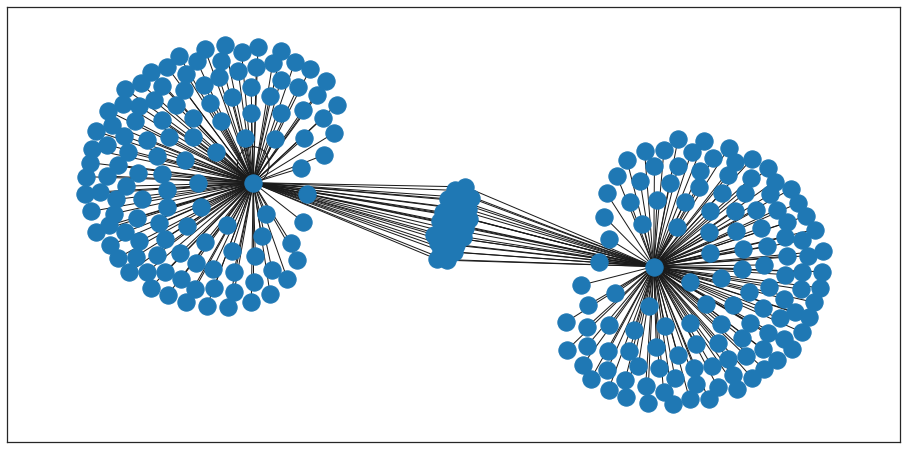

In [81]:
import networkx as nx

g = nx.from_pandas_edgelist(dt_tr_net1, 
                            source = 'from', 
                            target = 'to')

plt.figure(figsize = (16,8))
nx.draw_networkx(g,with_labels = False)  # apparently this wallets have transactions between a group of same other wallets 



In [82]:
nx.shortest_path(g, "A", "B") # wallet that connects A and B

['A', '0x283af0b28c62c092c9727f1ee09c02ca627eb7f5', 'B']

In [83]:
trx[trx.address == '0x283af0b28c62c092c9727f1ee09c02ca627eb7f5'] # wallet out of the ecosystem 

Empty DataFrame
Columns: [txn_id, user_id, address, grant_id, chain, txn_hash, network, token, amount_in_usdt, timestamp]
Index: []

# Conclusion and next steps 

Next steps would be pull this wallet transactioins and check for conection between "A"/ "B", and the wallet that connects them to the other gr15 donnators wallets  and their transactions. 
Probably pulling onchain data for all the grants that have similiar behaviour as done in this first test. 

The ideia here is to develop a metric based on this wallets connection to determinate  wether a group of grants are suspicius or not. 
Network analyses already has some inherent metrics that could be explorer further like: 
- Degree of Centrality 
- Degree of Closeness
- Betweenness Centrality 